In [1]:
import numpy as np
import pandas as pd

Импорт библиотек для анализа данных

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Импорт библиотек для графической визуализации данных

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Загрузка датасета и просмотр первых строк

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_columns:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    print(f'{col}: {zero_count} нулевых ({zero_percentage:.2f}%)')

Glucose: 5 нулевых (0.65%)
BloodPressure: 35 нулевых (4.56%)
SkinThickness: 227 нулевых (29.56%)
Insulin: 374 нулевых (48.70%)
BMI: 11 нулевых (1.43%)


In [7]:
outcome_counts = df['Outcome'].value_counts()
print('Распределение целевой переменной:')
print(outcome_counts)
print('\nПроцентное соотношение:')
print(df['Outcome'].value_counts(normalize=True) * 100)

Распределение целевой переменной:
Outcome
0    500
1    268
Name: count, dtype: int64

Процентное соотношение:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


/var/folders/m1/p9fjfgnx3539dzzzcr_7fmsh0000gn/T/ipykernel_98319/738810372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2', hue=None, legend=False)


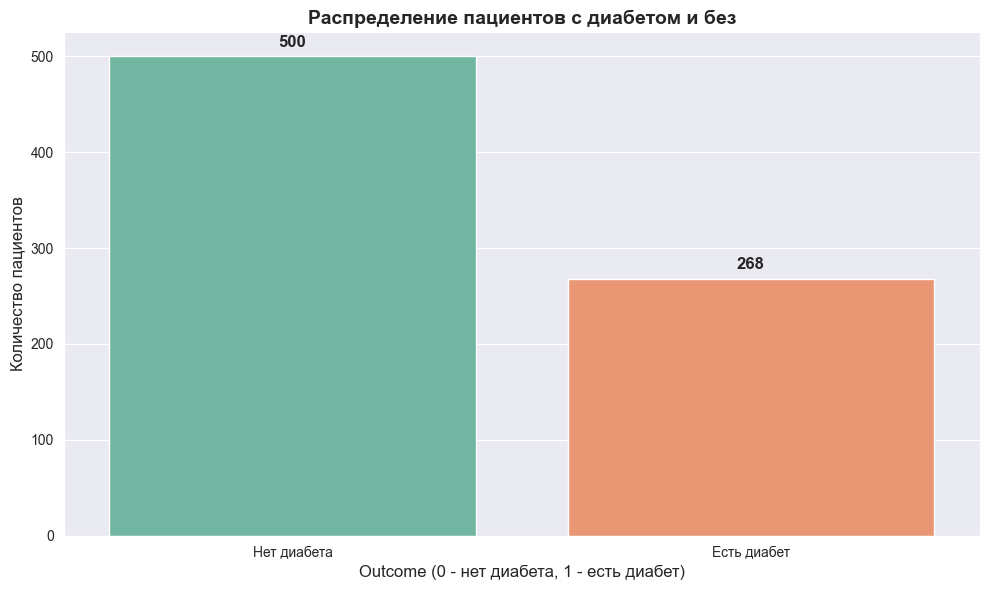

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome', data=df, palette='Set2', hue=None, legend=False)
plt.title('Распределение пациентов с диабетом и без', fontsize=14, weight='bold')
plt.xlabel('Outcome (0 - нет диабета, 1 - есть диабет)', fontsize=12)
plt.ylabel('Количество пациентов', fontsize=12)
plt.xticks([0, 1], ['Нет диабета', 'Есть диабет'])
for i, count in enumerate(df['Outcome'].value_counts().sort_index()):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

In [9]:
correlation_matrix = df.corr()
print('Корреляция признаков с целевой переменной:')
print(correlation_matrix['Outcome'].sort_values(ascending=False))

Корреляция признаков с целевой переменной:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


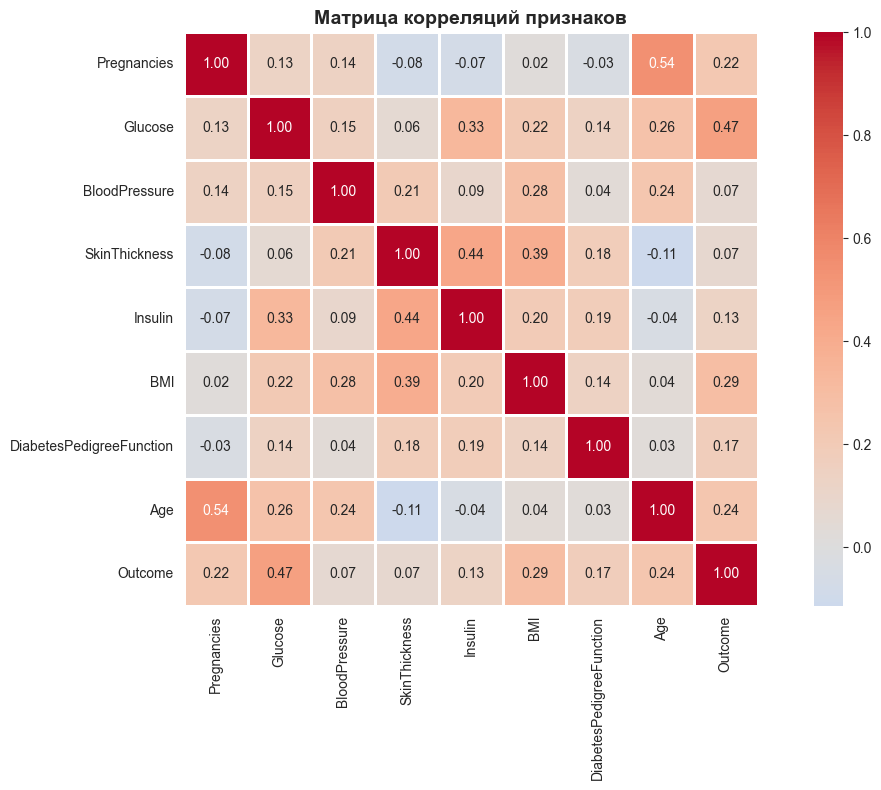

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Матрица корреляций признаков', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

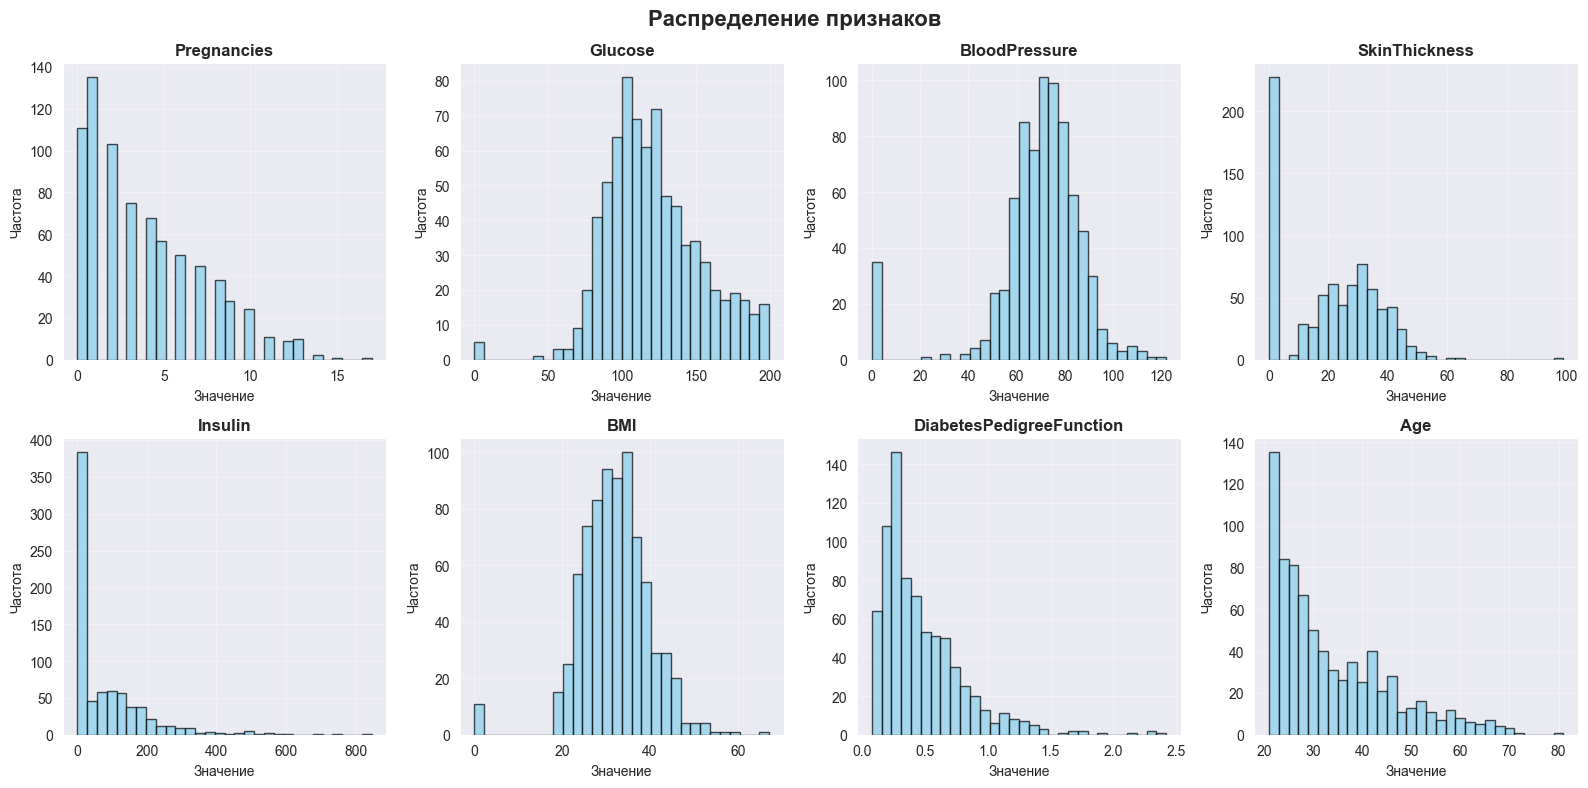

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Распределение признаков', fontsize=16, weight='bold')

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for idx, col in enumerate(columns):
    row = idx // 4
    col_idx = idx % 4
    axes[row, col_idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(col, fontsize=12, weight='bold')
    axes[row, col_idx].set_xlabel('Значение')
    axes[row, col_idx].set_ylabel('Частота')
    axes[row, col_idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
df['GlucoseCategory'] = pd.cut(df[df['Glucose'] > 0]['Glucose'],
                                bins=[0, 100, 125, 200],
                                labels=['Норма', 'Преддиабет', 'Диабет'])

glucose_analysis = df.groupby('GlucoseCategory', observed=True).agg({
    'Outcome': ['mean', 'count']
}).round(3)

print('Анализ по категориям глюкозы:')
print(glucose_analysis)


Анализ по категориям глюкозы:
                Outcome      
                   mean count
GlucoseCategory              
Норма             0.086   209
Преддиабет        0.280   257
Диабет            0.593   297


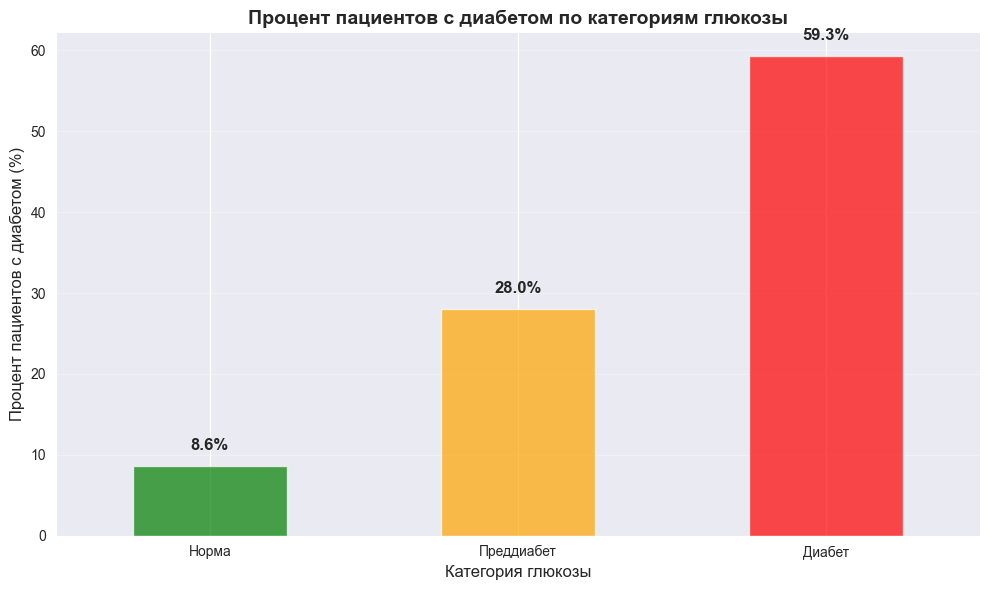

In [13]:
glucose_data = df.groupby('GlucoseCategory', observed=True)['Outcome'].mean() * 100

plt.figure(figsize=(10, 6))
glucose_data.plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title('Процент пациентов с диабетом по категориям глюкозы', fontsize=14, weight='bold')
plt.xlabel('Категория глюкозы', fontsize=12)
plt.ylabel('Процент пациентов с диабетом (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(glucose_data):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

In [14]:
df['BMICategory'] = pd.cut(df[df['BMI'] > 0]['BMI'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=['Недостаток', 'Норма', 'Избыток', 'Ожирение'])

bmi_analysis = df.groupby('BMICategory', observed=True).agg({
    'Outcome': ['mean', 'count']
}).round(3)

print('Анализ по категориям BMI:')
print(bmi_analysis)

Анализ по категориям BMI:
            Outcome      
               mean count
BMICategory              
Недостаток    0.000     4
Норма         0.065   108
Избыток       0.244   180
Ожирение      0.462   465


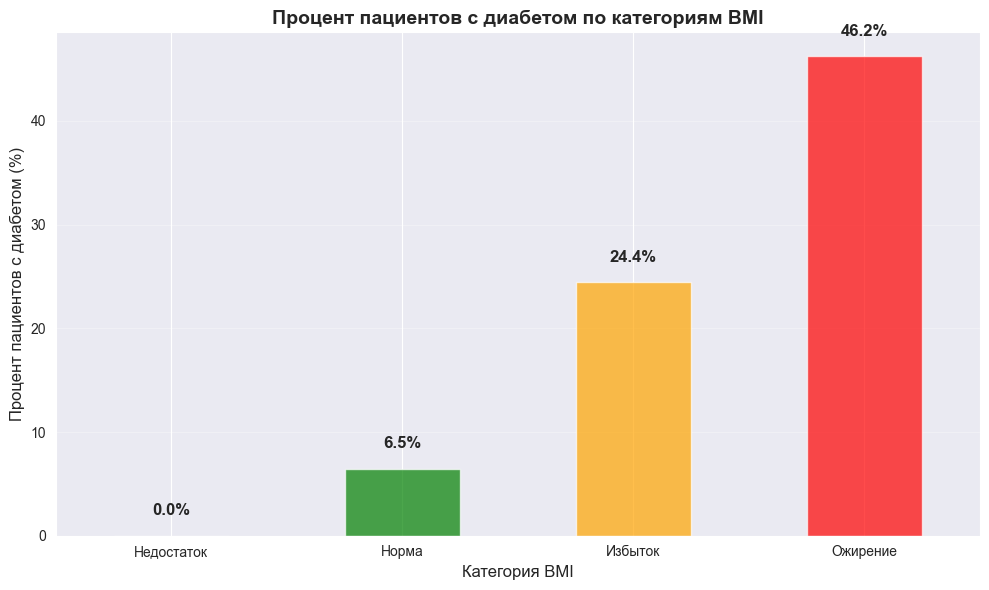

In [15]:
bmi_data = df.groupby('BMICategory', observed=True)['Outcome'].mean() * 100

plt.figure(figsize=(10, 6))
bmi_data.plot(kind='bar', color=['lightblue', 'green', 'orange', 'red'], alpha=0.7)
plt.title('Процент пациентов с диабетом по категориям BMI', fontsize=14, weight='bold')
plt.xlabel('Категория BMI', fontsize=12)
plt.ylabel('Процент пациентов с диабетом (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(bmi_data):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

In [16]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100],
                        labels=['21-30', '31-40', '41-50', '50+'])

age_analysis = df.groupby('AgeGroup', observed=True).agg({
    'Outcome': ['mean', 'count'],
    'Glucose': 'mean',
    'BMI': 'mean',
    'BloodPressure': 'mean'
}).round(2)

print('Анализ по возрастным группам:')
print(age_analysis)

Анализ по возрастным группам:
         Outcome       Glucose    BMI BloodPressure
            mean count    mean   mean          mean
AgeGroup                                           
21-30       0.22   417  114.18  31.32         65.32
31-40       0.48   157  126.18  32.89         70.27
41-50       0.57   113  124.88  34.50         74.79
50+         0.47    81  139.68  30.21         78.38


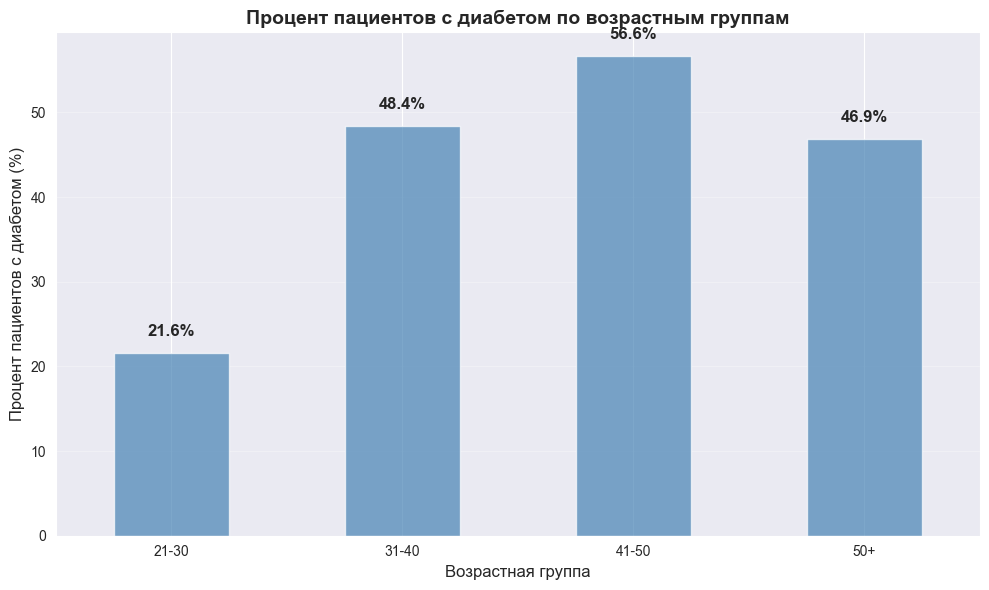

In [17]:
age_diabetes = df.groupby('AgeGroup', observed=True)['Outcome'].mean() * 100

plt.figure(figsize=(10, 6))
age_diabetes.plot(kind='bar', color='steelblue', alpha=0.7)
plt.title('Процент пациентов с диабетом по возрастным группам', fontsize=14, weight='bold')
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Процент пациентов с диабетом (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(age_diabetes):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

/var/folders/m1/p9fjfgnx3539dzzzcr_7fmsh0000gn/T/ipykernel_98319/1225880992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2', ax=axes[row, col])
/var/folders/m1/p9fjfgnx3539dzzzcr_7fmsh0000gn/T/ipykernel_98319/1225880992.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(['Нет диабета', 'Есть диабет'])
/var/folders/m1/p9fjfgnx3539dzzzcr_7fmsh0000gn/T/ipykernel_98319/1225880992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2', ax=axes[row, col])
/var/folders/m1/p9fjfgnx3539

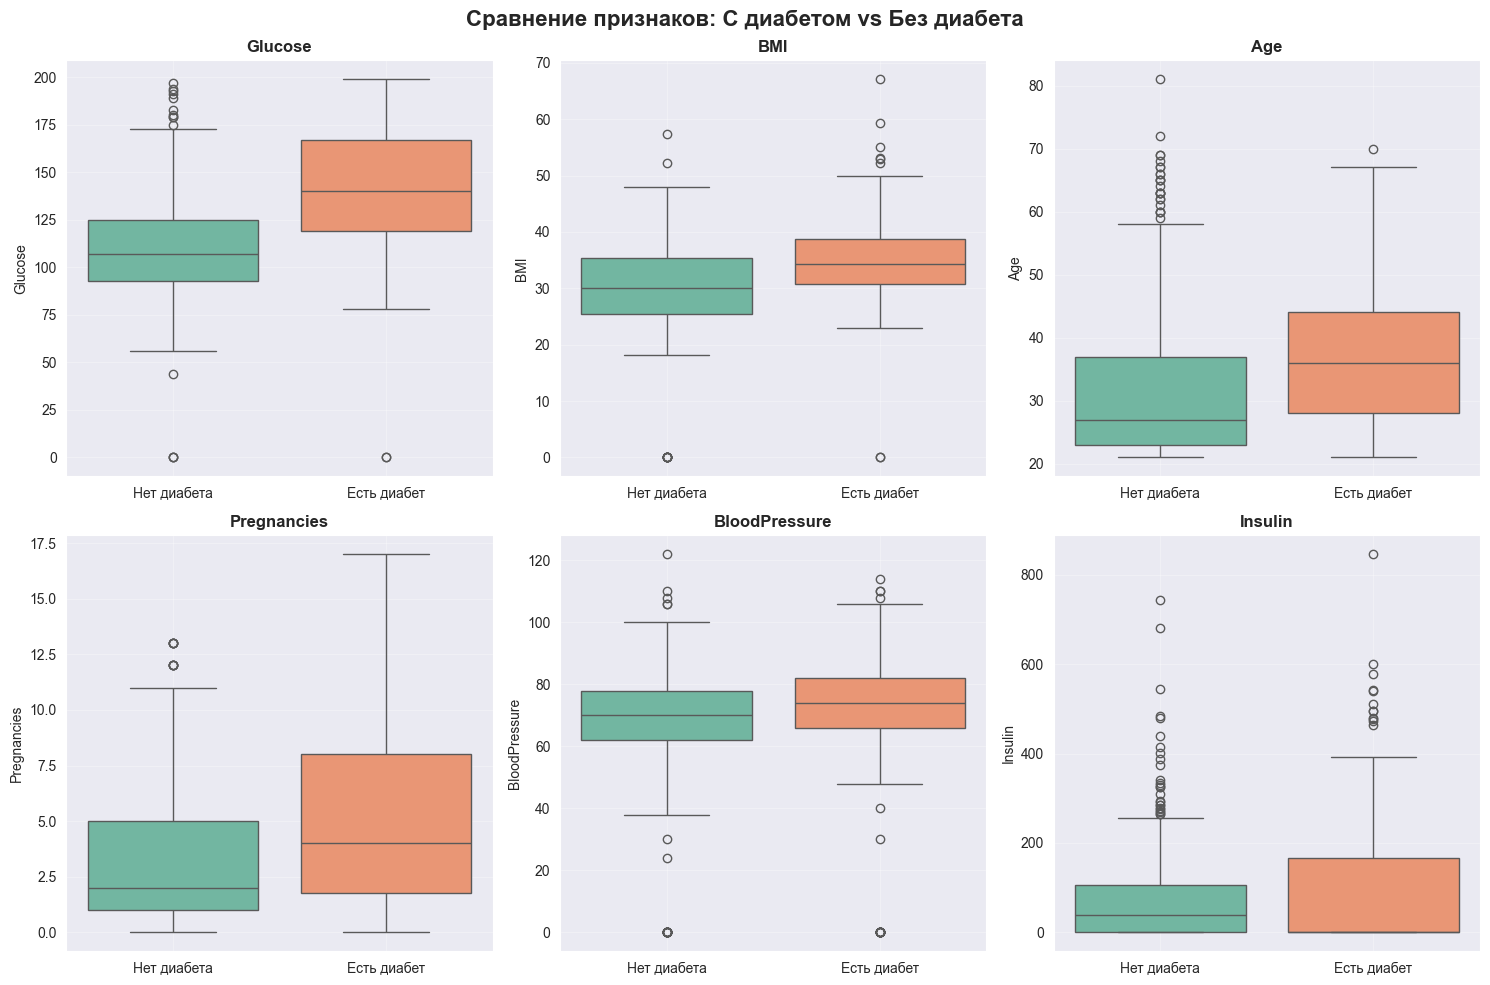

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Сравнение признаков: С диабетом vs Без диабета', fontsize=16, weight='bold')

features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'Insulin']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3

    sns.boxplot(x='Outcome', y=feature, data=df, palette='Set2', ax=axes[row, col])
    axes[row, col].set_title(feature, fontsize=12, weight='bold')
    axes[row, col].set_xlabel('')
    axes[row, col].set_xticklabels(['Нет диабета', 'Есть диабет'])
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
df_clean = df[(df['Glucose'] > 0) & (df['BMI'] > 0) & (df['BloodPressure'] > 0)].copy()

conditions = [
    (df_clean['Age'] > 45) & (df_clean['BMI'] > 30),
    (df_clean['Glucose'] > 125),
    (df_clean['BMI'] > 30) & (df_clean['BloodPressure'] > 80),
]

df_clean['RiskFactors'] = sum(conditions)

risk_analysis = df_clean.groupby('RiskFactors').agg({
    'Outcome': ['mean', 'count']
}).round(3)

print('Анализ по количеству факторов риска:')
print(risk_analysis)

Анализ по количеству факторов риска:
            Outcome      
               mean count
RiskFactors              
0             0.163   381
1             0.502   235
2             0.593    86
3             0.818    22


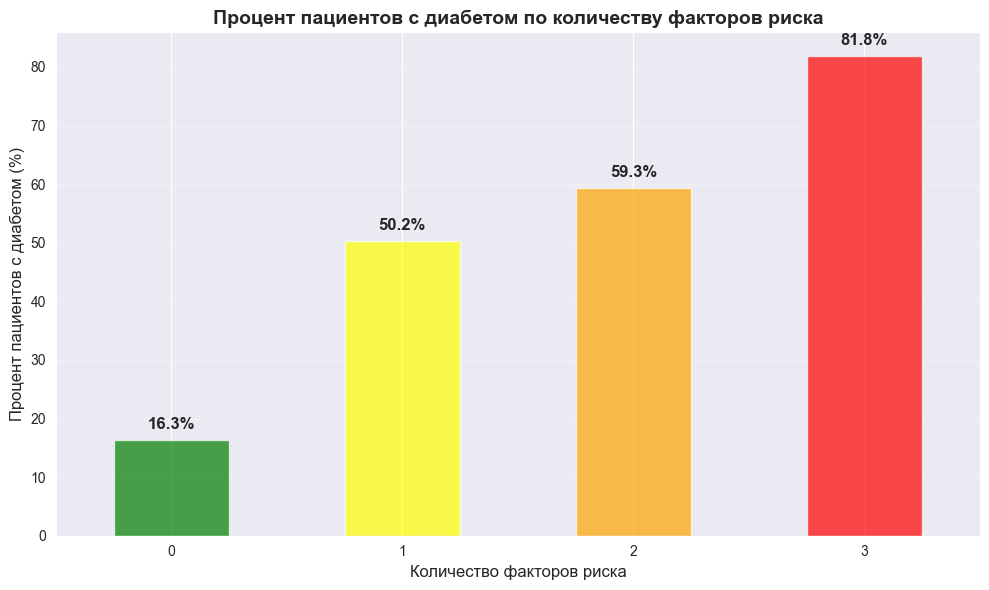

In [20]:
risk_data = df_clean.groupby('RiskFactors')['Outcome'].mean() * 100

plt.figure(figsize=(10, 6))
risk_data.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'], alpha=0.7)
plt.title('Процент пациентов с диабетом по количеству факторов риска',
          fontsize=14, weight='bold')
plt.xlabel('Количество факторов риска', fontsize=12)
plt.ylabel('Процент пациентов с диабетом (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(risk_data):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

In [21]:
comparison = df.groupby('Outcome').agg({
    'Pregnancies': ['mean', 'std'],
    'Glucose': ['mean', 'std'],
    'BloodPressure': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Age': ['mean', 'std'],
    'DiabetesPedigreeFunction': ['mean', 'std']
}).round(2)

comparison.index = ['Без диабета', 'С диабетом']
print('Сравнительная статистика групп:')
print(comparison)


Сравнительная статистика групп:
            Pregnancies       Glucose        BloodPressure           BMI  \
                   mean   std    mean    std          mean    std   mean   
Без диабета        3.30  3.02  109.98  26.14         68.18  18.06  30.30   
С диабетом         4.87  3.74  141.26  31.94         70.82  21.49  35.14   

                     Age        DiabetesPedigreeFunction        
              std   mean    std                     mean   std  
Без диабета  7.69  31.19  11.67                     0.43  0.30  
С диабетом   7.26  37.07  10.97                     0.55  0.37  


In [22]:
pregnancy_analysis = df.groupby('Pregnancies').agg({
    'Outcome': ['mean', 'count']
}).round(3)

print('Анализ по количеству беременностей:')
print(pregnancy_analysis)

Анализ по количеству беременностей:
            Outcome      
               mean count
Pregnancies              
0             0.342   111
1             0.215   135
2             0.184   103
3             0.360    75
4             0.338    68
5             0.368    57
6             0.320    50
7             0.556    45
8             0.579    38
9             0.643    28
10            0.417    24
11            0.636    11
12            0.444     9
13            0.500    10
14            1.000     2
15            1.000     1
17            1.000     1


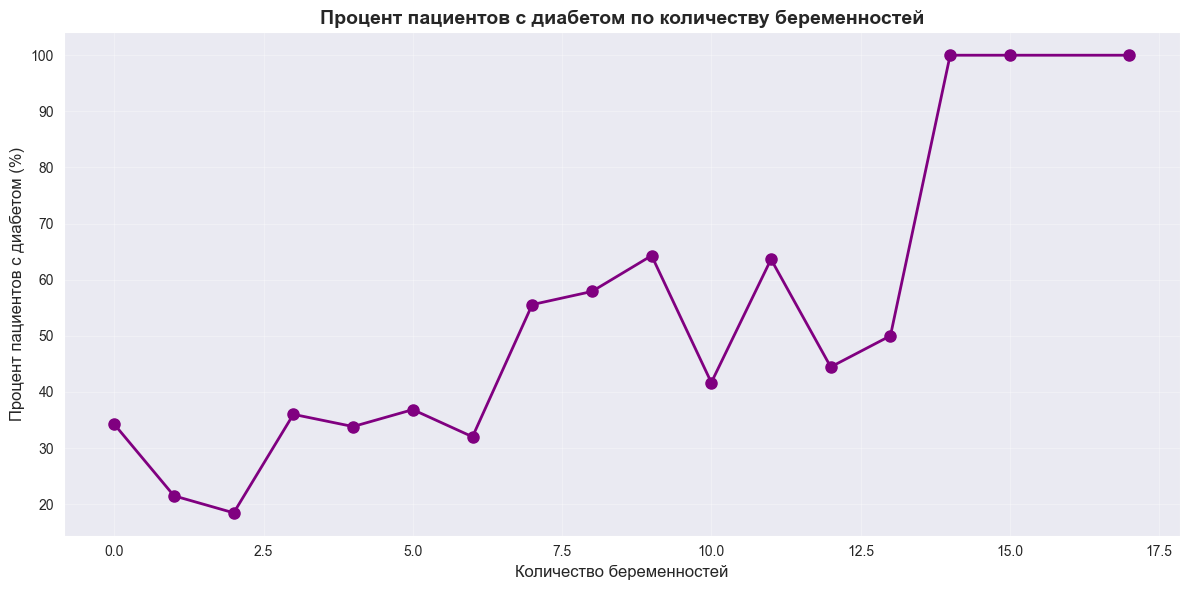

In [23]:
pregnancy_diabetes = df.groupby('Pregnancies')['Outcome'].mean() * 100

plt.figure(figsize=(12, 6))
pregnancy_diabetes.plot(kind='line', marker='o', linewidth=2, markersize=8, color='purple')
plt.title('Процент пациентов с диабетом по количеству беременностей',
          fontsize=14, weight='bold')
plt.xlabel('Количество беременностей', fontsize=12)
plt.ylabel('Процент пациентов с диабетом (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

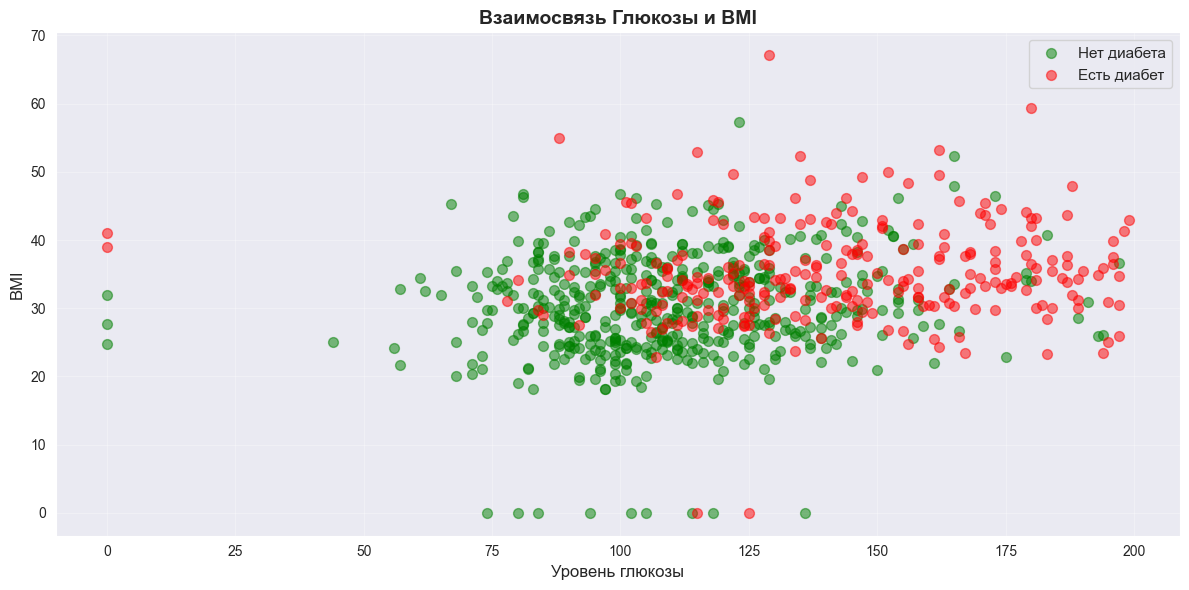

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(df[df['Outcome']==0]['Glucose'], df[df['Outcome']==0]['BMI'],
           alpha=0.5, c='green', label='Нет диабета', s=50)
plt.scatter(df[df['Outcome']==1]['Glucose'], df[df['Outcome']==1]['BMI'],
           alpha=0.5, c='red', label='Есть диабет', s=50)
plt.title('Взаимосвязь Глюкозы и BMI', fontsize=14, weight='bold')
plt.xlabel('Уровень глюкозы', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

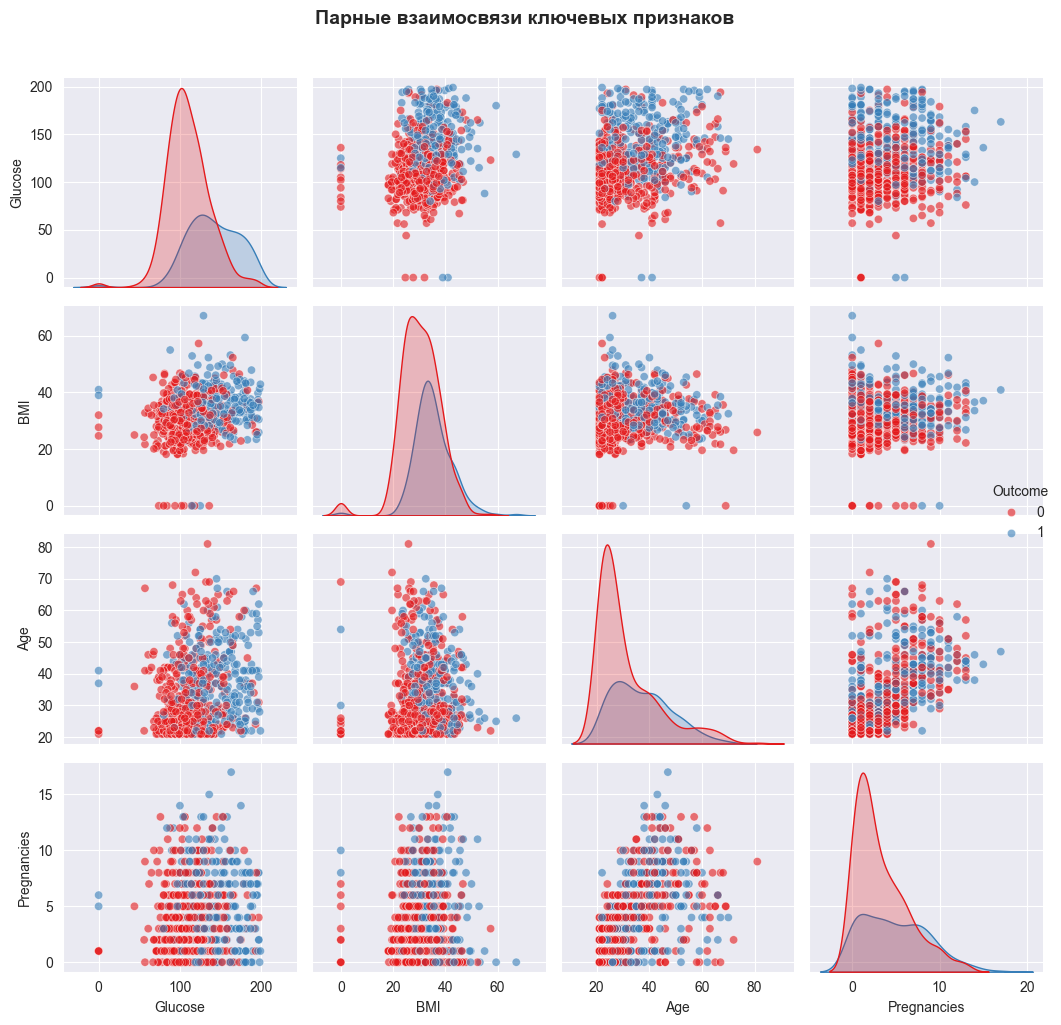

In [25]:
top_features = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']
sns.pairplot(df[top_features], hue='Outcome', palette='Set1',
             diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Парные взаимосвязи ключевых признаков', y=1.02, fontsize=14, weight='bold')
plt.tight_layout()
plt.show()